In [ ]:
weather = pd.read_csv("./data/weather.csv")

# date : datetime으로 형변환
weather['date'] = pd.to_datetime(weather['date'])

# codesum의 " " 은 moderate이므로 'MD'를 넣어준다
weather['codesum'].replace(" ",'MD',inplace=True)

# imputation
for i in weather.columns:
    weather[i] = weather[i].replace('-', np.nan)
    weather[i] = weather[i].replace(' ', np.nan)
    weather[i] = weather[i].replace('M', np.nan)

weather['snowfall'] = weather['snowfall'].replace('T', 0.05)
weather['snowfall'] = weather['snowfall'].replace('  T', 0.05)
weather['preciptotal'] = weather['preciptotal'].replace('  T', 0.005)

# column 전체 형변환
weather["tmax"] = weather["tmax"].astype("float")
weather["tmin"] = weather["tmin"].astype("float")
weather["tavg"] = weather["tavg"].astype("float")
weather["depart"] = weather["depart"].astype("float")
weather["dewpoint"] = weather["dewpoint"].astype("float")
weather["wetbulb"] = weather["wetbulb"].astype("float")
weather["heat"] = weather["heat"].astype("float")
weather["cool"] = weather["cool"].astype("float")
weather["stnpressure"] = weather["stnpressure"].astype("float")
weather["sealevel"] = weather["sealevel"].astype("float")
weather["resultspeed"] = weather["resultspeed"].astype("float")
weather["resultdir"] = weather["resultdir"].astype("float")
weather["avgspeed"] = weather["avgspeed"].astype("float")

In [ ]:
# year, month, day 컬럼 추가
year = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').year for i in range(len(weather))]
weather['year'] = year

month = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').month for i in range(len(weather))]
weather['month'] = month

day = [pd.to_datetime(weather["date"].values[i], format="%y%m%d", errors='ignore').day for i in range(len(weather))]
weather['day'] = day

20517
entire null count by columns
station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 906 ( 4.42 % )
tmin : 908 ( 4.43 % )
tavg : 912 ( 4.45 % )
depart : 11511 ( 56.1 % )
dewpoint : 666 ( 3.25 % )
wetbulb : 1252 ( 6.1 % )
heat : 1469 ( 7.16 % )
cool : 1469 ( 7.16 % )
sunrise : 9656 ( 47.06 % )
sunset : 9656 ( 47.06 % )
codesum : 0 ( 0.0 % )
snowfall : 7224 ( 35.21 % )
preciptotal : 860 ( 4.19 % )
stnpressure : 929 ( 4.53 % )
sealevel : 1724 ( 8.4 % )
resultspeed : 589 ( 2.87 % )
resultdir : 589 ( 2.87 % )
avgspeed : 875 ( 4.26 % )


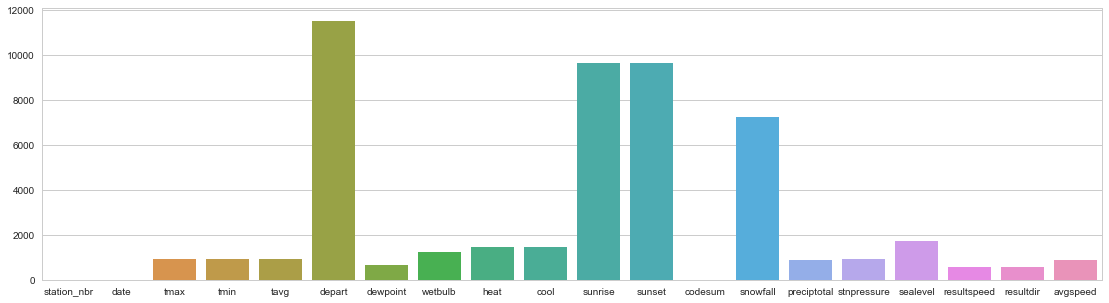

In [289]:
print(len(weather))
print("entire null count by columns")
dic = {}
for i in weather.columns:
    count_null = weather[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(weather) * 100),2),"%",")")
    
    dic[i] = count_null

plt.figure(figsize=(19,5))    
sns.barplot(x=list(dic.keys()), y=list(dic.values()))
plt.show()

In [ ]:
import datetime as dt
# 상대습도 계산
wthr["relative_humility"] = 100*(np.exp((17.625*((wthr['dewpoint']-32)/1.8))/(243.04+((wthr['dewpoint']-32)/1.8)))/np.exp((17.625*((wthr['tavg']-32)/1.8))/(243.04+((wthr['tavg']-32)/1.8))))

# 체감온도 계산
wthr["windchill"] = 35.74 + 0.6215*wthr["tavg"] - 35.75*(wthr["avgspeed"]**0.16) + 0.4275*wthr["tavg"]*(wthr["avgspeed"]**0.16)

# sunset, sunrise로 낮시간 계산
wthr['daytime'] = (((wthr['sunset'] // 100 * 60) + (wthr['sunset'] % 100))- ((wthr['sunrise'] // 100 * 60) + (wthr['sunrise'] % 100))) / 60

# 날짜데이터 datetime 변환
wthr["date"] = pd.to_datetime(wthr["date"])

# 요일 columns 추가(monday = 0, sunday = 6), 주말 columns 추가
# 평일 : 0, 토요일, 일요일 : 1
wthr["week7"] = wthr["date"].dt.dayofweek
wthr['weekend'] = 0
wthr.loc[wthr['week7'] == 5, 'weekend'] = 1
wthr.loc[wthr['week7'] == 6, 'weekend'] = 1

In [2]:
rain_text = ['FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC', 'FG', 'BR', 'UP', 'FG+']
other_text = ['HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC' ]

In [16]:
wthr['rainY'] = 0
idx_ls = []
for txt in rain_text:
    for idx in wthr.index.values:
        if txt in wthr.loc[idx, "codesum"]:
            idx_ls.append(idx)

In [17]:
wthr.loc[idx_ls, "rainY"] = 1

In [20]:
wthr['otherY'] = 0
idx_ls = []
for txt in other_text:
    for idx in wthr.index.values:
        if txt in wthr.loc[idx, "codesum"]:
            idx_ls.append(idx)

In [21]:
wthr.loc[idx_ls, "otherY"] = 1

In [22]:
wthr['nothing'] = 0
idx_ls = []

for idx in wthr.index.values:
    if "MD" in wthr.loc[idx, "codesum"]:
        idx_ls.append(idx)

In [23]:
wthr.loc[idx_ls, "nothing"] = 1